In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('data/spine_psu.csv').replace({"\,": "."}, regex=True).astype('float64')

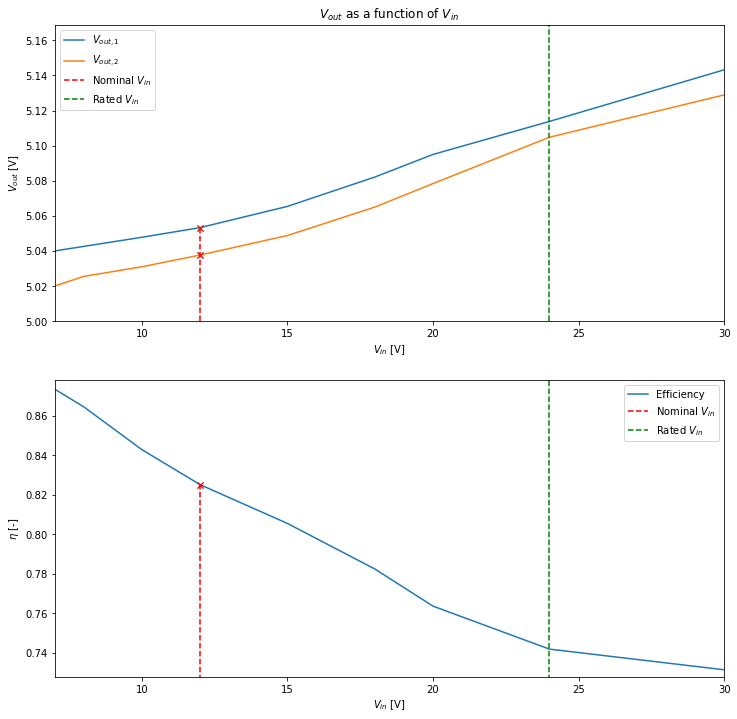

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(12,12))

## Plot Vout as a function of Vin

# plot data
ax[0].plot(data["Vin [V]"], data["Vout1 [V]"], label="$V_{out,1}$")
ax[0].plot(data["Vin [V]"], data["Vout2 [V]"], label="$V_{out,2}$")

#plot nominal and rated 
row = data[data["Vin [V]"] == 12]
upper = row[["Vout1 [V]", "Vout2 [V]"]].values.flatten().max()

ax[0].plot([12, 12], [5, upper], 'r--', label="Nominal $V_{in}$")
ax[0].plot([12, 12], [row["Vout1 [V]"], row["Vout1 [V]"]], 'rx')
ax[0].plot([12, 12], [row["Vout2 [V]"], row["Vout2 [V]"]], 'rx')
ax[0].plot([24, 24], [5, mmax := data[["Vout1 [V]", "Vout2 [V]"]].values.flatten().max()*1.005], 'g--', label="Rated $V_{in}$")

# plot labels, legend and title
ax[0].set_xlabel("$V_{in}$ [V]")
ax[0].set_ylabel("$V_{out}$ [V]")
ax[0].legend()
ax[0].set_title("$V_{out}$ as a function of $V_{in}$")
ax[0].set_ylim([5, mmax])
ax[0].set_xlim([data["Vin [V]"].min(), data["Vin [V]"].max()])

## Plot Efficiency as a function of Vin

# plot data
eff = (data["Vout1 [V]"] * data["Iout1 [mA]"] + data["Vout2 [V]"] * data["Iout2 [mA]"]) / (data["Vin [V]"] * (data["Iin [mA]"]))
ax[1].plot(data["Vin [V]"], eff, label="Efficiency")

# plot nominal and rated 
idx = data[data["Vin [V]"] == 12].index[0]
ax[1].plot([12, 12], [0, eff[idx]], 'r--', label="Nominal $V_{in}$")
ax[1].plot([12, 12], [eff[idx], eff[idx]], 'rx')
ax[1].plot([24, 24], [0, mmax := eff.max()*1.005], 'g--', label="Rated $V_{in}$")

ax[1].set_xlabel("$V_{in}$ [V]")
ax[1].set_ylabel("$\eta$ [-]")
ax[1].legend()
ax[1].set_ylim([eff.min()*0.995, mmax])
ax[1].set_xlim([data["Vin [V]"].min(), data["Vin [V]"].max()])

## Show
plt.show()